In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt 
import pandas as pd 


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device {device}')

using device cpu


In [4]:
from sklearn.datasets import make_regression  
train , target = make_regression(n_samples=100 , n_features=1 ,n_targets=1 , noise=10)

train_df = pd.DataFrame(train , columns=[f'feature {i}' for i in range(train.shape[1])])
target_df = pd.DataFrame(target , columns=['target'])

df = pd.concat([train_df,  target_df], axis=1)
df.head()


,feature 0,target
0,-1.684368,-131.867996
1,-1.899367,-136.689508
2,0.039130,-2.970758
3,-0.940471,-58.191424
4,-0.057039,-11.155512


In [5]:
from sklearn.model_selection import train_test_split 
xtrain, xtest , ytrain , ytest = train_test_split(train , target, test_size=0.2)

In [6]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((80, 1), (20, 1), (80,), (20,))

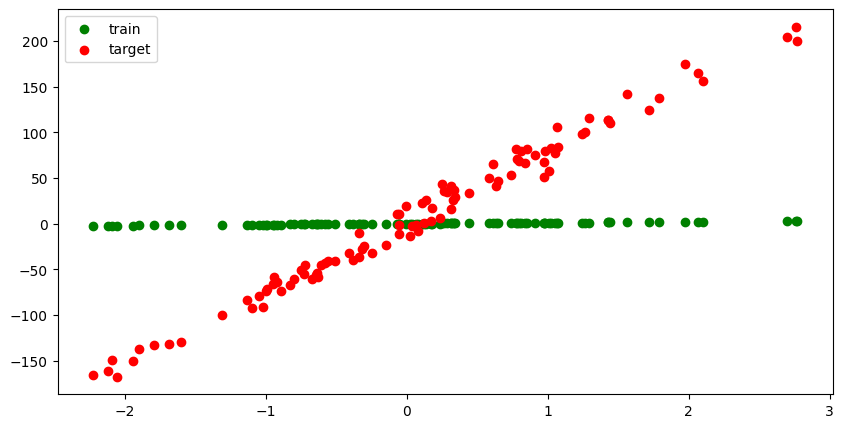

In [7]:
fig ,axes = plt.subplots(figsize = (10 ,5))
axes.scatter(train , train , color='green' , label ='train')
axes.scatter(train , target , color='red' , label='target')
axes.legend()

In [14]:
class LinearRegression(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1 , out_features=1)

    def forward(self, x:torch.tensor) ->torch.tensor: 
        return self.linear_layer(x)
    

model = LinearRegression()
model.state_dict() 
        

OrderedDict([('linear_layer.weight', tensor([[0.7793]])),
             ('linear_layer.bias', tensor([0.1417]))])